In [440]:
import pandas as pd
import numpy as np

from numpy import NaN,nan,NAN
from pandas import DataFrame

import warnings
warnings.filterwarnings(action='ignore')

In [441]:
df = pd.read_csv('gapminder.tsv', sep='\t')
df

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106
...,...,...,...,...,...,...
1699,Zimbabwe,Africa,1987,62.351,9216418,706.157306
1700,Zimbabwe,Africa,1992,60.377,10704340,693.420786
1701,Zimbabwe,Africa,1997,46.809,11404948,792.449960
1702,Zimbabwe,Africa,2002,39.989,11926563,672.038623


In [442]:
cdf = df['country']
cdf

subset= df[['country','continent','year']]
subset

df.loc[0]  # 행추출  -1은 에러
df.iloc[-1]

df.shape  # 1704, 6
lli = df.shape[0]-1  # 마지막 인덱스
df.loc[lli]

df.head(10)
df.tail(n=3)

df.loc[[0,100,1000]]

type(df.loc[0])  # Series
type(df.tail(1)) # DataFrame

df.iloc[[0,100,1000]]

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
100,Bangladesh,Asia,1972,45.252,70759295,630.233627
1000,Mongolia,Asia,1972,53.754,1320500,1421.741975


# loc, iloc

In [443]:
df.loc[:,['year','pop']]
df.iloc[:,[2,4]]
df[['year','pop']]
df.iloc[:,list(range(2,5))]

df.iloc[:,0:6:2]

df.iloc[[0,99,999],[0,2,4]]
df.loc[[0,99,999],['country','year','pop']]

,country,year,pop
0,Afghanistan,1952,8425333
99,Bangladesh,1967,62821884
999,Mongolia,1967,1149500


# groupby(

In [454]:
df.year.unique()
df.groupby('year')[['lifeExp']].mean()

df.columns
df.groupby(['continent','year'])[['gdpPercap']].mean()

# 그룹화한 데이터의 개수
# df.groupby('year')[['lifeExp']].nunique()
# df.groupby('continent')['country'].nunique()

gdpPercap
continent year              
Africa    1952   1252.572466
          1957   1385.236062
          1962   1598.078825
          1967   2050.363801
          1972   2339.615674
          1977   2585.938508
          1982   2481.592960
          1987   2282.668991
          1992   2281.810333
          1997   2378.759555
          2002   2599.385159
          2007   3089.032605
Americas  1952   4079.062552
          1957   4616.043733
          1962   4901.541870
          1967   5668.253496
          1972   6491.334139
          1977   7352.007126
          1982   7506.737088
          1987   7793.400261
          1992   8044.934406
          1997   8889.300863
          2002   9287.677107
          2007  11003.031625
Asia      1952   5195.484004
          1957   5787.732940
          1962   5729.369625
          1967   5971.173374
          1972   8187.468699
          1977   7791.314020
          1982   7434.135157
          1987   7608.226508
          1992   8639.690248
          1997   9834.093295
          2002  10174.090397
          2007  12473.026870
Europe    1952   5661.057435
          1957   6963.012816
          1962   8365.486814
          1967  10143.823757
          1972  12479.575246
          1977  14283.979110
          1982  15617.896551
          1987  17214.310727
          1992  17061.568084
          1997  19076.781802
          2002  21711.732422
          2007  25054.481636
Oceania   1952  10298.085650
          1957  11598.522455
          1962  12696.452430
          1967  14495.021790
          1972  16417.333380
          1977  17283.957605
          1982  18554.709840
          1987  20448.040160
          1992  20894.045885
          1997  24024.175170
          2002  26938.778040
          2007  29810.188275

In [445]:
import matplotlib.pyplot as plt

In [451]:
gle = df.groupby('year')[['lifeExp']].mean()
gle.sum(axis=1)

year
1952    49.057620
1957    51.507401
1962    53.609249
1967    55.678290
1972    57.647386
1977    59.570157
1982    61.533197
1987    63.212613
1992    64.160338
1997    65.014676
2002    65.694923
2007    67.007423
dtype: float64

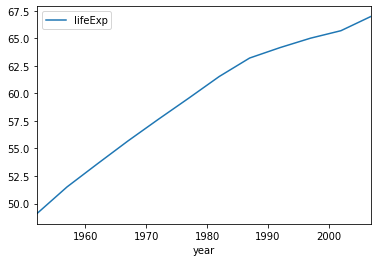

In [75]:
gle.plot()  # 선그래프

# 시리즈 만들기

In [83]:
s = pd.Series(['apple',30],name='test',index=['name','num'])
s
s.loc['num']
s.iloc[1]

30

# 데이터 프레임 만들기

In [96]:
df = DataFrame({
    'Name':['AAA','BBB'],
    'Age':[20,30]
}, index=['first','second'])
first_row = df.loc['first']
type(first_row)  # 시리즈

first_row.index
first_row.keys()

first_row.values

first_row.index[0]

ages = df['Age']
ages.mean()

25.0

In [257]:
scientists = pd.read_csv('scientists.csv')

ages = scientists['Age']
ages.max()
ages.min()
ages.mean()
ages[ages>ages.mean()]

ages + ages  # 요소간 덧셈을 한 시리즈
ages * ages
ages + 100  # 시리즈 + 스칼라 = 브로드캐스팅

ages+pd.Series([1,100])  # 행인덱스가 같은 요소끼리는 더해지고 나머지는 NaN

0     38.0
1    161.0
2      NaN
3      NaN
4      NaN
5      NaN
6      NaN
7      NaN
dtype: float64

In [258]:
rev_ages = ages.sort_index(ascending=False)  # 인덱스 기준
ages.sort_values(ascending=False) # 값 기준

2    90
7    77
3    66
1    61
4    56
5    45
6    41
0    37
Name: Age, dtype: int64

In [259]:
print(ages)
print(rev_ages)

print(ages+rev_ages)  # 인덱스를 기준으로 더함

0    37
1    61
2    90
3    66
4    56
5    45
6    41
7    77
Name: Age, dtype: int64
7    77
6    41
5    45
4    56
3    66
2    90
1    61
0    37
Name: Age, dtype: int64
0     74
1    122
2    180
3    132
4    112
5     90
6     82
7    154
Name: Age, dtype: int64


In [260]:
scientists[scientists.Age>scientists.Age.mean()]

scientists['Born'].dtype  # 'O' = Object
scientists.dtypes
pd.to_datetime(scientists['Born']).dtype

bd = pd.to_datetime(scientists['Born'], format='%Y-%m-%d')
dd = pd.to_datetime(scientists['Died'], format='%Y-%m-%d')

scientists['bd'],scientists['dd'] = bd,dd
scientists

scientists['bt'] = scientists['bd']-scientists['dd']
scientists

,Name,Born,Died,Age,Occupation,bd,dd,bt
0,Rosaline Franklin,1920-07-25,1958-04-16,37,Chemist,1920-07-25,1958-04-16,-13779 days
1,William Gosset,1876-06-13,1937-10-16,61,Statistician,1876-06-13,1937-10-16,-22404 days
2,Florence Nightingale,1820-05-12,1910-08-13,90,Nurse,1820-05-12,1910-08-13,-32964 days
3,Marie Curie,1867-11-07,1934-07-04,66,Chemist,1867-11-07,1934-07-04,-24345 days
4,Rachel Carson,1907-05-27,1964-04-14,56,Biologist,1907-05-27,1964-04-14,-20777 days
5,John Snow,1813-03-15,1858-06-16,45,Physician,1813-03-15,1858-06-16,-16529 days
6,Alan Turing,1912-06-23,1954-06-07,41,Computer Scientist,1912-06-23,1954-06-07,-15324 days
7,Johann Gauss,1777-04-30,1855-02-23,77,Mathematician,1777-04-30,1855-02-23,-28422 days


In [292]:
import random

random.seed(1004)

random.shuffle(scientists['Age'])
print(scientists['Age'])

0    37
1    61
2    90
3    66
4    56
5    45
6    41
7    77
Name: Age, dtype: int64


In [295]:
scientists.drop('Age',axis=1)

,Name,Born,Died,Occupation,bd,dd,bt
0,Rosaline Franklin,1920-07-25,1958-04-16,Chemist,1920-07-25,1958-04-16,-13779 days
1,William Gosset,1876-06-13,1937-10-16,Statistician,1876-06-13,1937-10-16,-22404 days
2,Florence Nightingale,1820-05-12,1910-08-13,Nurse,1820-05-12,1910-08-13,-32964 days
3,Marie Curie,1867-11-07,1934-07-04,Chemist,1867-11-07,1934-07-04,-24345 days
4,Rachel Carson,1907-05-27,1964-04-14,Biologist,1907-05-27,1964-04-14,-20777 days
5,John Snow,1813-03-15,1858-06-16,Physician,1813-03-15,1858-06-16,-16529 days
6,Alan Turing,1912-06-23,1954-06-07,Computer Scientist,1912-06-23,1954-06-07,-15324 days
7,Johann Gauss,1777-04-30,1855-02-23,Mathematician,1777-04-30,1855-02-23,-28422 days


In [297]:
# 피클 : 데이터 객체를 그대로 저장
names = scientists['Name']

In [304]:
names.to_pickle('sci_name.pickle')
scientists.to_pickle('sci_df.pickle')

In [305]:
pd.read_pickle('sci_name.pickle')
pd.read_pickle('sci_df.pickle')

,Name,Born,Died,Age,Occupation,bd,dd,bt
0,Rosaline Franklin,1920-07-25,1958-04-16,37,Chemist,1920-07-25,1958-04-16,-13779 days
1,William Gosset,1876-06-13,1937-10-16,61,Statistician,1876-06-13,1937-10-16,-22404 days
2,Florence Nightingale,1820-05-12,1910-08-13,90,Nurse,1820-05-12,1910-08-13,-32964 days
3,Marie Curie,1867-11-07,1934-07-04,66,Chemist,1867-11-07,1934-07-04,-24345 days
4,Rachel Carson,1907-05-27,1964-04-14,56,Biologist,1907-05-27,1964-04-14,-20777 days
5,John Snow,1813-03-15,1858-06-16,45,Physician,1813-03-15,1858-06-16,-16529 days
6,Alan Turing,1912-06-23,1954-06-07,41,Computer Scientist,1912-06-23,1954-06-07,-15324 days
7,Johann Gauss,1777-04-30,1855-02-23,77,Mathematician,1777-04-30,1855-02-23,-28422 days


In [306]:
scientists.to_excel('sci.xls')

In [308]:
df1 = pd.read_csv('concat_1.csv')
df2 = pd.read_csv('concat_2.csv')
df3 = pd.read_csv('concat_3.csv')

In [318]:
rc = pd.concat([df1,df2,df3])
rc.loc[[3]]

,A,B,C,D
3,a3,b3,c3,d3
3,a7,b7,c7,d7
3,a11,b11,c11,d11


In [326]:
nrs = pd.Series(['n1','n2','n3','n4'],name='N')
pd.concat([df1,nrs],axis=1)

,A,B,C,D,N
0,a0,b0,c0,d0,n1
1,a1,b1,c1,d1,n2
2,a2,b2,c2,d2,n3
3,a3,b3,c3,d3,n4


In [329]:
nrdf = pd.DataFrame([['n1','n2','n3','n4']],columns=['A','B','C','D'])
nrdf

,A,B,C,D
0,n1,n2,n3,n4


In [335]:
pd.concat([df1,nrdf],axis=0)

df1.append(nrdf)
df1.append(nrdf, ignore_index=True)

,A,B,C,D
0,a0,b0,c0,d0
1,a1,b1,c1,d1
2,a2,b2,c2,d2
3,a3,b3,c3,d3
4,n1,n2,n3,n4


In [343]:
# 딕셔너리를 데이터프레임에 합치기

myDict={'A':'n1','B':'n2','C':'n3','D':'n4'}
df1.append(myDict, ignore_index=True)

,A,B,C,D
0,a0,b0,c0,d0
1,a1,b1,c1,d1
2,a2,b2,c2,d2
3,a3,b3,c3,d3
4,n1,n2,n3,n4


In [354]:
rci = pd.concat([df1,df2,df3],ignore_index=True)
rci

# 열발향으로 데이터프레임 연결
cc = pd.concat([df1,df2,df3],axis=1)
cc

cc['A']
cc['ncl'] = ['n1','n2','n3','n4']
cc

cc = pd.concat([df1,df2,df3],axis=1, ignore_index=True)
cc

,0,1,2,3,4,5,6,7,8,9,10,11
0,a0,b0,c0,d0,a4,b4,c4,d4,a8,b8,c8,d8
1,a1,b1,c1,d1,a5,b5,c5,d5,a9,b9,c9,d9
2,a2,b2,c2,d2,a6,b6,c6,d6,a10,b10,c10,d10
3,a3,b3,c3,d3,a7,b7,c7,d7,a11,b11,c11,d11


In [375]:
df2.columns=['E','F','G','H']
df2
df3.columns=['A','C','F','H']
df3

rc = pd.concat([df1,df2,df3])
rc
pd.concat([df1,df2,df3], join='inner')

df1
df3
pd.concat([df1,df3], join='inner')

df2.index=[4,5,6,7]
df2
df3.index=[0,2,5,7]
df3
pd.concat([df1,df2,df3],axis=1, join='inner')
pd.concat([df1,df3],axis=1, join='inner')

,A,B,C,D,A,C,F,H
0,a0,b0,c0,d0,a8,b8,c8,d8
2,a2,b2,c2,d2,a9,b9,c9,d9


In [377]:
person = pd.read_csv('survey_person.csv')
site = pd.read_csv('survey_site.csv')
survey = pd.read_csv('survey_survey.csv')
visited = pd.read_csv('survey_visited.csv')

In [395]:
visited_subset = visited.loc[[0,2,6]]
# print(visited_subset)
# print(site)

o2o = site.merge(visited_subset, left_on='name', right_on='site')
o2o
print(site)
print(visited)
site.merge(visited, left_on='name', right_on='site')

    name    lat    long
0   DR-1 -49.85 -128.57
1   DR-3 -47.15 -126.72
2  MSK-4 -48.87 -123.40
   ident   site       dated
0    619   DR-1  1927-02-08
1    622   DR-1  1927-02-10
2    734   DR-3  1939-01-07
3    735   DR-3  1930-01-12
4    751   DR-3  1930-02-26
5    752   DR-3         NaN
6    837  MSK-4  1932-01-14
7    844   DR-1  1932-03-22


,name,lat,long,ident,site,dated
0,DR-1,-49.85,-128.57,619,DR-1,1927-02-08
1,DR-1,-49.85,-128.57,622,DR-1,1927-02-10
2,DR-1,-49.85,-128.57,844,DR-1,1932-03-22
3,DR-3,-47.15,-126.72,734,DR-3,1939-01-07
4,DR-3,-47.15,-126.72,735,DR-3,1930-01-12
5,DR-3,-47.15,-126.72,751,DR-3,1930-02-26
6,DR-3,-47.15,-126.72,752,DR-3,NaN
7,MSK-4,-48.87,-123.40,837,MSK-4,1932-01-14


In [405]:
ps

,ident,personal,family,taken,person,quant,reading
0,dyer,William,Dyer,619,dyer,rad,9.82
1,dyer,William,Dyer,619,dyer,sal,0.13
2,dyer,William,Dyer,622,dyer,rad,7.80
3,dyer,William,Dyer,622,dyer,sal,0.09
4,pb,Frank,Pabodie,734,pb,rad,8.41
5,pb,Frank,Pabodie,734,pb,temp,-21.50
6,pb,Frank,Pabodie,735,pb,rad,7.22
7,pb,Frank,Pabodie,751,pb,rad,4.35
8,pb,Frank,Pabodie,751,pb,temp,-18.50
9,lake,Anderson,Lake,734,lake,sal,0.05


In [414]:
ps = person.merge(survey, left_on='ident', right_on='person')
vs = visited.merge(survey, left_on='ident', right_on='taken')

ps.merge(vs, left_on=['ident','taken','quant','reading'], right_on=['person','ident','quant','reading'])

,ident_x,personal,family,taken_x,person_x,quant,reading,ident_y,site,dated,taken_y,person_y
0,dyer,William,Dyer,619,dyer,rad,9.82,619,DR-1,1927-02-08,619,dyer
1,dyer,William,Dyer,619,dyer,sal,0.13,619,DR-1,1927-02-08,619,dyer
2,dyer,William,Dyer,622,dyer,rad,7.80,622,DR-1,1927-02-10,622,dyer
3,dyer,William,Dyer,622,dyer,sal,0.09,622,DR-1,1927-02-10,622,dyer
4,pb,Frank,Pabodie,734,pb,rad,8.41,734,DR-3,1939-01-07,734,pb
5,pb,Frank,Pabodie,734,pb,temp,-21.50,734,DR-3,1939-01-07,734,pb
6,pb,Frank,Pabodie,735,pb,rad,7.22,735,DR-3,1930-01-12,735,pb
7,pb,Frank,Pabodie,751,pb,rad,4.35,751,DR-3,1930-02-26,751,pb
8,pb,Frank,Pabodie,751,pb,temp,-18.50,751,DR-3,1930-02-26,751,pb
9,lake,Anderson,Lake,734,lake,sal,0.05,734,DR-3,1939-01-07,734,lake


In [420]:
# 다 같은표현 nan
NaN
nan
NAN

pd.isnull(nan)  # True
pd.notnull(nan) # False

False

In [435]:
# 누락값 발생 원인
# 실수로 누락, merge

gap = pd.read_csv('gapminder.tsv', sep='\t')
le = gap.groupby(['year'])['lifeExp'].mean()
le.loc[range(2000,2010)].notnull()

le[le.index>2000]

year
2002    65.694923
2007    67.007423
Name: lifeExp, dtype: float64